In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
#from PIL import Image

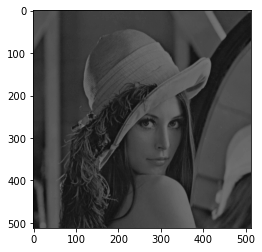

In [5]:
# load image
file = "./lena_raw_512x512.raw"
fileID = open(file, "rb")
Img = np.fromfile(fileID, dtype = 'uint8', sep = "")
Img = np.reshape(Img, [512, 512])
plt.imshow(Img,cmap='gray', vmin=0, vmax=500)

In [ ]:
# load image
file = "./BOAT512.raw"
fileID = open(file, "rb")
Img = np.fromfile(fileID, dtype = 'uint8', sep = "")
Img = np.reshape(Img, [512, 512])
plt.imshow(Img,cmap='gray', vmin=0, vmax=500)